Modern artificial intelligence relies on the representational power and computational capabilities of networks of interconnected elementary processing units (neurons). This concept came to light during the 1950s, where a collective effort, widespread over many different disciplines, took on the daunting mystery of the nature of human intelligence and the mechanisms behind cognition and reasoning. The first proposal of artificial neurons, followed by learning theories, gave rise to the beginning of modern cognitive science, and the birth of artificial neural networks. Much interest in the subject was sparked also by the possibilities offered by the first computing machines. This new technology raised the question whether such computing devices, equipped with powerful algorithms and enough computational power, could show intelligent behaviour.

# Boltzmann Machine

A Boltzmann machine, like a Sherrington–Kirkpatrick model, is a so-called _energy-based model_. It is a neural network with an associated total "energy" (Hamiltonian) defined for the overall state of its neurons or units, which are binary. The Boltzmann machine weights are stochastic and its global energy is identical in form to that of Hopfield networks and Ising models:

$$ E = -\sum_{i,j}W_{i,j}x_i x_j+\sum_k b_k x_k$$
where: $W_{ij}$ is the connection strength between unit $i$ and $j$, $x_{i} \in [0,1]$ is the state of the $i$-th unit, and $b_{i}$ is its corresponding bias.

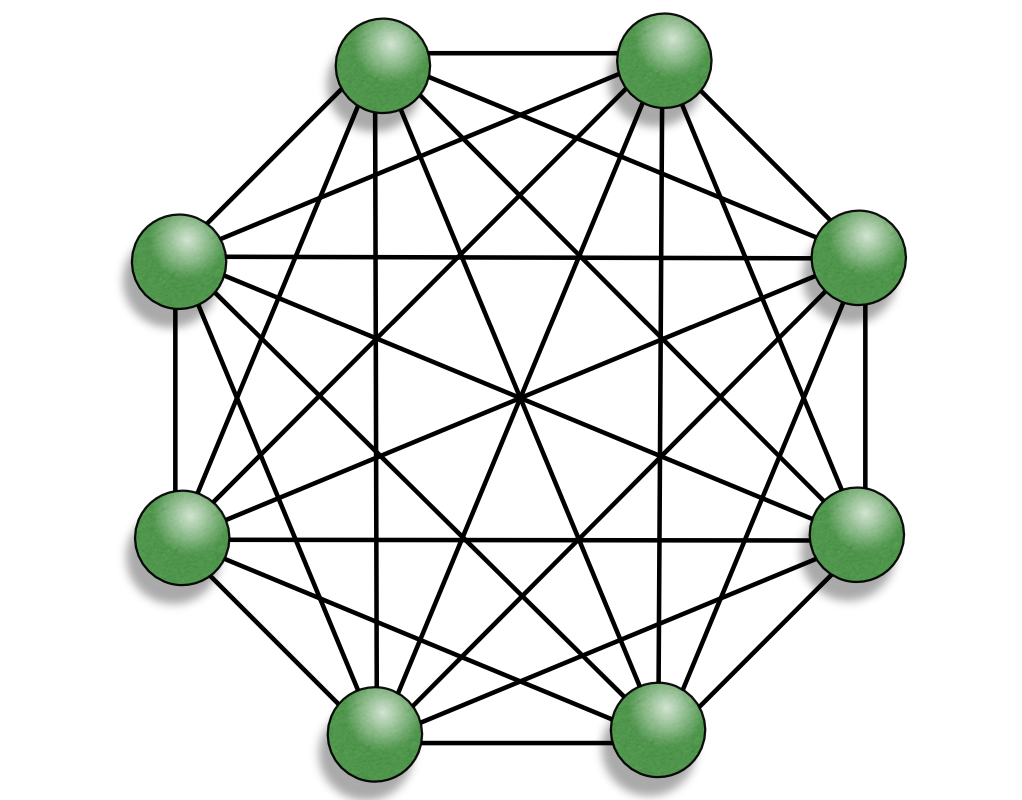

The training of this model corresponds to finding the global minimum of the energy. This means that the system must be able to escape local energy minima, which can be achieved by occasionally allowing jumps to higher energy states. A natural way to create these jumps is to place the system at thermal equilibrium at inverse temperature $\beta = 1/T $. The thermal fluctuations modify the elementary computation of each neuron from deterministic to stochastic. In the Boltzmann machine, a neuron $i$ updates to the state $x_i = 1$ with probability:
$$ p_i=\frac{1}{1+e^{-\beta \Delta E_i}}\,, $$ where the energy gap is $\Delta E_i = \sum_j W_{i,j}x_j + b_i$ .

At zero temperature ($\beta \to \infty$) we recover the Hopfield model minimizing energy. At any finite temperature, the dynamics of the stochastic neurons minimize free energy $F = U − T S$, where $U = \left\langle E \right\rangle$ is the internal energy and $S$ is the entropy. This means that higher energy states can be reached with a probability that increases with the temperature. If we let the system update with the above rule, the network will reach the following equilibrium Boltzmann distribution: 

$$ p(x)\propto e^{-\beta E(x)} $$

One effective strategy to exploit the thermal fluctuations to find the global minimum of E(x)is to start at high temperature and gradually decreasing it with a controlled schedule. This technique is called **simulated annealing** and can succeed to discover, at sufficiently low temperature, a final state corresponding to a “good” solution of the optimization problem.

# Restricted Boltzmann Machine

A restricted Boltzmann machine (RBM) is a stochastic neural network with two differentiated sets of units: visible and hidden. The connectivity in the RBM is restricted and only interactions between different types of units are allowed, i.e., there are no visible-visible or hidden-hidden connections. Thus, we usually refer to the RBM as having two fully connected layers: a visible layer $v = (v_1, \dots , v_{N_v})$ and a hidden layer $h = (h_1,\dots,h_{N_h})$ with symmetric interaction $W$. The biases are defined as two vectors $b$ and $c$ for the visible and hidden units respectively. The energy function is:

$$E_\lambda(h,v)=-\sum_{i,j}^{N_v,N_h}W_{i,j}h_iv_j-\sum_{i}^{N_v}b_iv_i-\sum_{i}^{N_h}c_ih_i$$

Where $\lambda=(W,b,c)$ is the set of free parameters of the model. The probability distribution of the network is given by the Boltzmann distribution:
$$p_\lambda(h,v)=\frac{e^{-E_\lambda(h,v)}}{Z_\lambda}$$
and the partition function is defined as:
$$Z_\lambda=\sum_{h,v}e^{-E_\lambda(h,v)}$$

We are interested in using the RBM for generative modeling. Thus, the “output” of the network is given in terms of the probability distribution that the RBM associates with the input space, i.e., the visible layer. The visible distribution is obtained simply by tracing out the hidden degrees of freedom:
$$p_\lambda(v)=Tr_h\left[p_\lambda(h,v) \right] $$
Due to the bipartite structure of the network, the probability density factorizes and the summation can be evaluated exactly:
$$p_\lambda(v)=\frac{e^{-\epsilon_\lambda(v)}}{Z_\lambda}$$
where we have defined:
$$\epsilon_\lambda(v)=-\sum_{i}^{N_h}log\left(1+e^{\sum_jW_{i,j}v_j+c_i}\right)-\sum_{i}^{N_v}b_iv_i$$
often called free energy in the machine learning community. However, we will refer to $\epsilon_\lambda(v)$ as effective visible energy (or effective energy), not to be confused with the free energy of the neural network 
$F = − log \left(Z_\lambda \right)$.

An important property of the RBM, compared to a regular Boltzmann machines, is the conditional independence of the units within the same layer. This means that the state of a hidden unit hi, only 
depends on the current state of the visible layer v (and vice versa). The two conditional distributions $p_\lambda(v|h)$ and $p_\lambda(h | v)$, factorize over each single unit:
\begin{align}
p_\lambda(v|h) &= \prod_j p_\lambda(v_j|h)\\
p_\lambda(h|v) &= \prod_i p_\lambda(h_i|v)
\end{align}
And every probability in the product can be obtained independently. For instance, the probability for a visible unit $j$ to be active, given a hidden layer in the state $h$ is:
$$p_\lambda(v_j=1|h)= \frac{1}{1+e^{-\Delta_{v_j}}}\,,$$
where
$\Delta_{v_j}=\sum_i W_{i,j}h_i+b_j$. Analogously, the conditional probability of activating the hidden unit $i$ given the state $v$ is:
$$p_\lambda(h_i=1|v)= \frac{1}{1+e^{-\Delta_{h_i}}}\,,$$
where $\Delta_{h_i}=\sum_j W_{i,j}v_j+c_i$.


## Unsupervised learning

Generative modeling consists of learning the constraints underlying a probability distribution defined over the input space. This way, the neural network can generate input patterns by itself according to the correct (unknown) probability distribution, which we call $q(v)$. The learning occurs by changing the internal parameters to find an optimal set $\lambda^*$, such that the probability distribution defined by the RBM mimics the target distribution, $p_{\lambda^*}\sim q$.

The learning mechanism is formulated, as usual, with an optimization problem through of a cost function $C_{\lambda}$.
For the case of generative modeling, the ultimate goal is to reduce the “distance” between the input distribution $q(v)$ and the RBM distribution $p_\lambda(v)$. We adopt the standard choice of Kullbach-Leibler (KL) divergence (or relative entropy), defined as:
$$C_\lambda^q=KL(q||p_{\lambda})=\sum_v q(v)\log \frac{q(v)}{p_{\lambda}(v)}\,.$$
Notice that the term $q(v)\log q(v)$ does not depend on our model. Thus, we use the average negative log-likelihood:
$$ \left\langle \mathcal{L}_{\lambda} \right\rangle_q=-\sum_vq(v)log(p_{\lambda}(v))$$

::: {.callout-note}
The KL divergence is not a proper distance measure, since it is non-symmetric ($KL(q||p)\neq KL(p||q)$ in general) and it does not satisfy the triangle inequality. Nevertheless, the KL divergence is zero if and only if the two probability distribution are equal almost everywhere. Thus, we can safely use it to quantify the distnace between distributions.
:::

We proceed now to calculate the gradient of the cost function with respect to all network parameters $\lambda$.
The unknown distribution q(v) is, in practice, encoded implicitly into a training dataset $D = \{v1,v2,...\}$ containing $|D|$ independent configurations $v_k$, identically distributed according to $q(v)$. The unknown distribution $q(v)$ is approximated by the _empirical distribution_:
$$ q(v')=\frac {1}{|D|} \sum_{v_k\in D }\delta (v'-v_k)$$
which results into the approximate divergence:
$$C_\lambda^q \simeq \left\langle \mathcal{L}_{\lambda} \right\rangle_D + \sum_vq'(v)log(q'(v))\,.$$

As we mention above, the second term of the equation is constant and does not need to be learned. It is also called the entropy of the distribution $q'$. The only relevant term for the optimization is the negative log-likelihood:
$$ \left\langle \mathcal{L}_{\lambda} \right\rangle_D=  \frac {1}{|D|} \sum_{v'}\sum_{v_k\in D } \delta (v'-v_k) log(p_{\lambda}(v')= \frac {1}{|D|} \sum_{v_k\in D}\epsilon_\lambda(v_k)+log(Z_\lambda)$$
To perform an optimization of this cost function, we need to compute the gradient of the negative log likelihood:
$$\nabla_\lambda  \left\langle \mathcal{L}_{\lambda} \right\rangle_D=\nabla_\lambda  \frac {1}{|D|} \sum_{v_k\in D}\epsilon_\lambda(v_k)+ \nabla_\lambda log(Z_\lambda)\,,$$
which can be rewritten as:
$$\nabla_\lambda  \left\langle \mathcal{L}_{\lambda} \right\rangle_D= \left\langle \nabla_\lambda  \epsilon_{\lambda}(v) \right\rangle_{v\sim D} - \left\langle \nabla_\lambda  \epsilon_{\lambda}(v) \right\rangle_{v\sim p_\lambda}$$

The gradients of the effective visible energy have the simple form:
$$ \frac{\partial}{\partial W_{i,j}}\epsilon_{\lambda}(v)=-\frac{1}{1+e^{-\Delta_{h_i}}}v_j$$
$$ \frac{\partial}{\partial b_{j}}\epsilon_{\lambda}(v)=-v_j$$
$$ \frac{\partial}{\partial c_{i}}\epsilon_{\lambda}(v)=-\frac{1}{1+e^{-\Delta_{h_i}}}$$
where we recall the definition:
$$\Delta_{h_i}=\sum_j W_{i,j}v_j+c_i$$

In the positive phase driven by the data $\left\langle \nabla_\lambda  \epsilon_{\lambda}(v) \right\rangle_{v\sim D}$, the energy is lowered for input data configurations (thus increasing their probabilities). During the negative phase $-\left\langle \nabla_\lambda  \epsilon_{\lambda}(v) \right\rangle_{v\sim p_\lambda}$, the learning occurs in reverse, with the signal generated by the RBM equilibrium distribution:
$$ \left\langle \nabla_\lambda  \epsilon_{\lambda}(v) \right\rangle_{v\sim p_\lambda}= \sum_v p_\lambda(v) \epsilon_{\lambda}(v)\,.$$

Since the evaluation of the negative phase requires a summation over an exponential number of states $v$, we calculate this term using Monte Carlo (MC) sampling of the RBM as:
$$ \left\langle \nabla_\lambda  \epsilon_{\lambda}(v) \right\rangle_{v\sim p_\lambda} \sim \frac 1 M \sum_{l=1}^M  \epsilon_{\lambda}(v_l) $$
The effective energy gradient is averaged over $M$ configurations $v_l$ sampled from the RBM. 

## Gibbs Sampling

Given the restricted conditional independence of the RBM graph, an MC sampling technique called **Gibbs sampling** (a.k.a. heat bath or Glauber dynamics) allows us to obtain a fast evaluation of the negative phase of the loss.

The general philosophy behind MC sampling is to simulate the evolution of the system (in our case the visible layer) state by state, and compute the expectation value of some observables (such as the effective energy gradient) as an average in Markov time. Contrary to full enumeration, where each state $v$ is weighted in the sum, we build a sequence of $M ≪ 2^N$ states in such a way that each state v appears with a probability $p_\lambda(v)$ (also called importance sampling). 

In Gibbs sampling, we update each variable sequentially, conditioned on the values of all the other variables. For the case of the RBM, this corresponds to samping each visible unit $v_j$ from the conditional distribution $p_\lambda(v_j | h,v_{/j})$ (this reads the probability of $v_j=1$ given $h$ and all elements of $v$ except $v_j$), and each hidden unit $h_i$ from the conditional distribution $p_\lambda(h_j | v,h_{/j})$.

However, the RBM structure has the special property that each unit is conditionally independent from the others of the same layer. Thus, we can instead sample all the units in one layer simultaneously (Block Gibbs sampling)! Given an initial state $v$, the selection probability to sample a new state $v′$ is given by the two RBM layer-wise conditional distributions $g(v\to v′)=p_\lambda(v′ |h)p\lambda(h|v)$ corresponding to the transitions $v \to h$ and $h \to v′$. Given this expression, we can easily verify that $g(v \to v′)$ satisfies detailed balance condition. Furthermore, once a new state has been chosen according to the selection probability, the move is always accepted with unit probability.


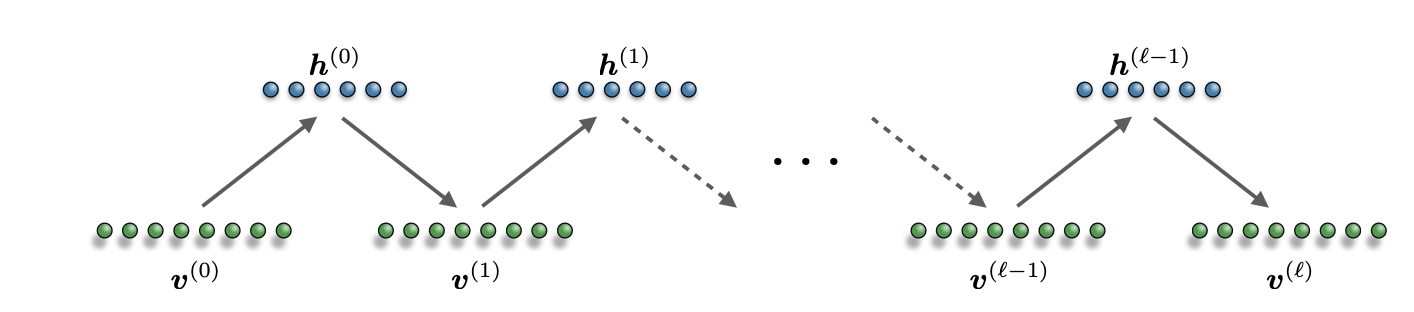

To summarize: given an initial state $v(0)$, a new state $v(1)$ is sampled from the distribution $p_\lambda(v)$ in two steps:

1. Sample a hidden state from the conditional distribution $p_\lambda(h(0)|v(0))$
2. Sample a visible state from $p_\lambda(v(1) | v(0))$. 

Because of the bipartite structure of the RBM graph, each variable in a layer can be independently sampled simultaneously, leading to layer-wise block sampling. We can repeat this process as many times as we want to build a Markov chain.

In [ ]:
def gibbs_sampling(k, v_0, W, v_bias, h_bias):
    v_k = np.zeros_like(v_0)
    h_0 = np.zeros_like(h_bias)
    h_k = np.zeros_like(h_bias)

    h_0 = gibbs_vtoh(W, v_0, h_bias)
    v_k = gibbs_htov(W, h_0, v_bias)
    for i in range(k):
        h_k = gibbs_vtoh(W, v_k, h_bias)
        v_k = gibbs_htov(W, h_k, v_bias)
    return v_k, h_0, h_k


def gibbs_vtoh(W, v, h_bias):
    activation=np.zeros_like(h_bias)
    for i in range(activation.shape[0]):
        for j in range(activation.shape[1]):
            activation[i,j] = sigmoid(h_bias[i,j] + np.sum(v*W[:,:,i,j]))

    h_k = np.random.binomial(1,activation,size=activation.shape)
    return h_k

def gibbs_htov(W, h, v_bias):
    activation=np.zeros_like(v_bias)
    for i in range(activation.shape[0]):
        for j in range(activation.shape[1]):
            activation[i,j] = sigmoid(v_bias[i,j] + np.sum(h*W[i,j,:,:]))

    v_k = np.random.binomial(1, activation, size=activation.shape)
    return v_k

# Learning the Ising model

Let's see an example of training an RBM to learn the probability distribution of the Ising model in two dimensions, described by the Hamiltonian $$ H = \sum_{<i,j>}\sigma_i \sigma_j\,,$$ where $<i,j>$ denotes nearest neighbors on the lattice. For this example, we will consider a small square lattice of $2\times 3$ spins, which effectively condition the dimension of the visible layer in our RBM, a temperature $T=1$.

In [ ]:
#| hide
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rows, columns = 2, 3
T = 1.0

## Building a dataset

Before we dive into our model, we need a suitable dataset to train it. We will sample 100000 spin configurations with the [Metropolis-Hastings algorithm](https://borjarequena.github.io/Neural-Network-Course/course/montecarlo_integration.html#metropolis-hasting-algorithm) to build our dataset.

In [ ]:
def H(spin):
    n_r, n_c  = spin.shape # used for for loops
    spin = 2 * spin - 1 # maps {0,1} to {-1,1}
    
    H = 0.
    for i in range(n_r):
        for j in range(n_c):
            if j+1 != n_c: #if next index is not out of bounds
                H += spin[i,j]*spin[i,j+1]
            if i+1 != n_r:
                H += spin[i,j]*spin[i+1,j]
    return -H

def Met_Hast(n_v_r,n_v_c, T, num_iterations):
        #Random spin configuration
        spin = 2* np.random.randint(2,size = (n_v_r,n_v_c)) - 1 #{0,1} --> {-1,1}
        E = H(spin) # calculate initial energy
        data_set = np.zeros((num_iterations, n_v_r,n_v_c),dtype=int)
        
        for i in range(num_iterations):
            #Choose random coordinate on 2d lattice to flip
            x = np.random.randint(n_v_r)
            y = np.random.randint(n_v_c)
            spin[x,y] *= -1
            
            #Calculate energy change due to flipped spin
            E_neighbors = 0.
            if x != 0:         # if there is a site to the left
                E_neighbors += spin[x-1,y]
            if x != (n_v_r-1): # if there is a site to the right
                E_neighbors += spin[x+1,y]
            if y != 0:         # if there is a site below
                E_neighbors += spin[x,y-1]
            if y != (n_v_c-1): # if there is a site above
                E_neighbors += spin[x,y+1]

            dE = -2 * spin[x,y] * E_neighbors

            #Accept or reject the flipped site
            if np.random.random() < np.exp(-dE/T):
                E += dE
            else:
                spin[x,y] *= -1

            #Add spin configuration to data set
            np.copyto(data_set[i,:,:], spin)
        return (data_set+1)/2 #{-1,1} --> {0,1}

With this algorithm, we choose one spin site on the lattice and flip it. The flip is automatically accepted if the energy of the system decreases. However, it can also be accepted with some probability if the energy of the system increases. This probability follows a Boltzmann distribution that depends on the temperature, as we saw in the previous part of the course. 

Let's sample the configurations and shuffling the data to eliminate any possible correlation between samples.

In [ ]:
data_set_size = 100000
data_set = Met_Hast(n_v_r, n_v_c, T, data_set_size)
np.random.shuffle(data_set)

## RBM parameters

Now let's initialize the parameters of our RBM. The dimension of the visible layer must match the size of our physical system. Therefore, we have $N_v=2\times3=6$ visible neurons. However, the size of the hidden layer is completely free. In this case, we will take $N_h=16$ hidden units.

In [ ]:
# Visible layer structure
n_v_r = rows
n_v_c = columns
N_v = n_v_r * n_v_c # Total number of visible neurons

#Hidden Layer structure
n_h_r = 4
n_h_c = 4
N_h = n_h_r * n_h_c

Having set the sizes, we can initialize the actual parameters. The size of our weight matrix depends entirely on the number of visible and hidden neurons.

In [ ]:
# Array Initialization
width = np.sqrt(1./(N_v + N_h)) 
W = np.random.uniform(low=-width/2., high=width/2., size=(N_v*N_h)).reshape((n_v_r, n_v_c, n_h_r, n_h_c))
v_bias = np.ones(N_v).reshape(n_v_r, n_v_c)
h_bias = np.ones(N_h).reshape(n_h_r, n_h_c)

## Probability distribution of the RBM

A probability distribution can be represented by the parameter values of the Restricted Boltzmann Machine based on the formula
$$ p(\sigma) = \frac{1}{Z}e^{\varepsilon} $$
where $\varepsilon$ is defined as
$$ \varepsilon = \sum_{j}b_j \sigma_j + \sum_{i} log(1+e^{c_i + \sum_j W_{ij} \sigma_j})$$

- $\sigma_j$: jth visible node
- $b_j$: bias of jth visible node
- $c_i$: bias of ith hidden node
- $W_{ij}$: weight between ith hidden node and jth visible node
- $Z$: Partition Function

In [ ]:
def p_model(W, v_bias, h_bias, v_set):
    n_spin = len(v_set[0,0,:])
    n_v_r,n_v_c = v_bias.shape
    n_h_r,n_h_c = h_bias.shape
    p_model = np.zeros(n_spin)

    for spin in range(n_spin):
        c_ = 0.
        a_ = np.sum(v_bias*v_set[:,:,spin])
        for i in range(n_h_r):
            for j in range(n_h_c):
                b_ = np.sum(np.multiply(W[:,:,i,j], v_set[:,:,spin]))
                c_ += np.log(1 + np.exp(h_bias[i,j] + b_))
        p_model[spin] = np.exp(a_ + c_)
    Z = float(np.sum(p_model))
    return p_model/Z

def p_s(size, T):
    #size: tuple - (n_r, n_c)
    #Used in exact Hamiltonian models
    #   -calculate e^-(H(sig)/T) /Z
    N = size[0]*size[1]
    p_model = np.zeros(2**N)
    v_set = np.zeros((size[0],size[1],2**N)) #set of all possible spin configurations
    for i in range(len(p_model)):

        np.copyto(v_set[:,:,i], np.array([int(x) for x in np.binary_repr(i,width=N)]).reshape(size))
        p_model[i] = np.exp(-H(v_set[:,:,i])/T)
    Z = np.sum(p_model)
    return p_model/Z, v_set


p_exact,v_set = p_s((n_v_r, n_v_c), T)
p_model_before_train = p_model(W, v_bias, h_bias, v_set)

## Training with Stochastic Gradient Descent

To train the model, need to compute the gradient of the KL divergence between the probability distribution of our data and the probability distribution defined by the RBM. Then, we can perform a stochastic gradient descent (SGD) update of our parameters.

In [ ]:
batch_size = 200
num_batches = int(data_set_size/batch_size)
num_epochs = 5
learning_rate = 0.2
k = 5

In [ ]:
def sigmoid(x):
    return 1./(1+np.exp(-x))

def train(W, v_bias, h_bias, k, data_set, batch_size, num_batches, num_epochs, learning_rate):
    #Gradient Descent Arrays
    dW = np.zeros_like(W)
    dv_bias = np.zeros_like(v_bias)
    dh_bias = np.zeros_like(h_bias)

    #Gibbs Sampling Arrays
    v_0 = np.empty_like(v_bias, dtype=int)
    v_k = np.empty_like(v_bias, dtype=int)
    h_0 = np.empty_like(h_bias, dtype=int)
    h_k = np.empty_like(h_bias, dtype=int)

    num_data = data_set.shape[0]
    start = np.random.randint(num_data)

    for i_epoch in range(num_epochs):
        for i_batches in range(num_batches):
            dW *= 0.
            dv_bias *= 0.
            dh_bias *= 0.
            for i_input in range(batch_size):
                # gibbs sample
                v_0 = data_set[(i_input + start + batch_size*i_batches) % num_data,:,:]
                v_k, h_0, h_k = gibbs_sampling(k, v_0, W, v_bias, h_bias)

                # update dW, dv_bias, ...
                dW += np.tensordot(v_0, h_0,axes=0) - np.tensordot(v_k, h_k,axes=0)
                dv_bias += v_0 - v_k
                dh_bias += h_0 - h_k
            
            # Update parameters 
            np.copyto(W, W + dW * learning_rate/batch_size)
            np.copyto(v_bias, v_bias + dv_bias * learning_rate/batch_size)
            np.copyto(h_bias, h_bias + dh_bias * learning_rate/batch_size)
            
            if (i_batches+1) % 100 == 0:
                print("Epoch: %d/%d"%(i_epoch+1, num_epochs),
                      ' Batch: %d/%d'%(i_batches+1, num_batches))
    
    return W, v_bias, h_bias

Call the training algorithm and then construct the probability distribution of each spin configuration based on the weights and biases in the RBM.  

In [ ]:
# Train
W, v_bias, h_bias = train(W, v_bias, h_bias, k, data_set, batch_size, num_batches, num_epochs, learning_rate)

# Find Probability distribution of states
p_model_after_train = p_model(W, v_bias, h_bias, v_set)

Epoch: 1/5  Batch: 100/500
Epoch: 1/5  Batch: 200/500
Epoch: 1/5  Batch: 300/500
Epoch: 1/5  Batch: 400/500
Epoch: 1/5  Batch: 500/500
Epoch: 2/5  Batch: 100/500
Epoch: 2/5  Batch: 200/500
Epoch: 2/5  Batch: 300/500
Epoch: 2/5  Batch: 400/500
Epoch: 2/5  Batch: 500/500
Epoch: 3/5  Batch: 100/500
Epoch: 3/5  Batch: 200/500
Epoch: 3/5  Batch: 300/500
Epoch: 3/5  Batch: 400/500
Epoch: 3/5  Batch: 500/500
Epoch: 4/5  Batch: 100/500
Epoch: 4/5  Batch: 200/500
Epoch: 4/5  Batch: 300/500
Epoch: 4/5  Batch: 400/500
Epoch: 4/5  Batch: 500/500
Epoch: 5/5  Batch: 100/500
Epoch: 5/5  Batch: 200/500
Epoch: 5/5  Batch: 300/500
Epoch: 5/5  Batch: 400/500
Epoch: 5/5  Batch: 500/500


In [ ]:
def KL_div(exact, model):
    A = 0.
    for i in range(len(exact)):
        A +=  exact[i] * np.log(exact[i]/model[i])
    return A

KL Divergence
Before Training: 3.467045765617308
After Training: 0.13813080305017178


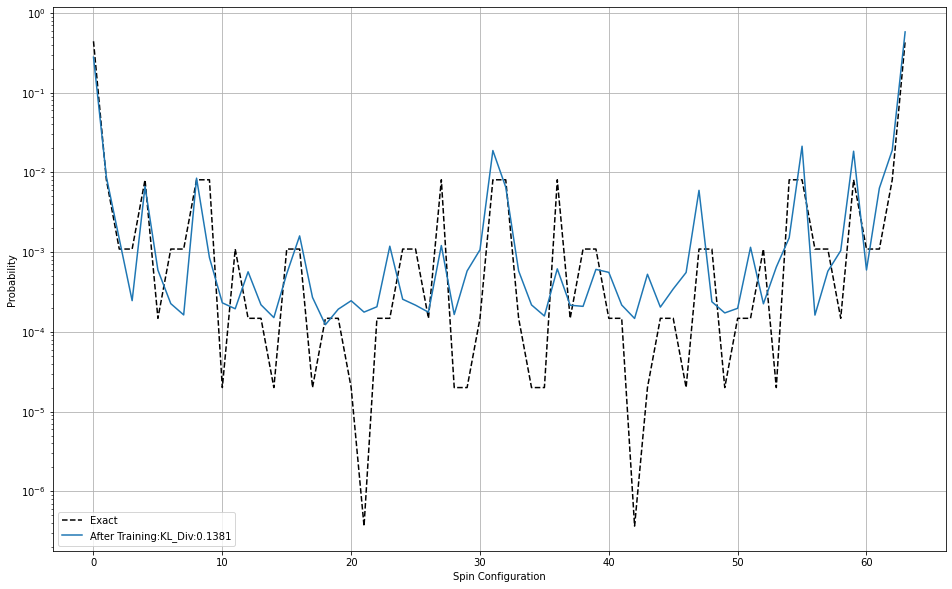

In [ ]:
#| code-fold: true
KL_b = KL_div(p_exact, p_model_before_train)
KL_a = KL_div(p_exact, p_model_after_train)

print('KL Divergence')
print('Before Training:', KL_b)
print('After Training:', KL_a)

#Plot the probability distributions
plt.figure(figsize=(16, 10))

plt.plot(p_exact, 'k--',label='Exact')
#plt.plot(p_model_before_train, label='Before Training: KL_Div:%.4f'%KL_b)
plt.plot(p_model_after_train, label='After Training:KL_Div:%.4f'%KL_a)

plt.yscale('log')
plt.ylabel("Probability")
plt.xlabel("Spin Configuration")
plt.grid(True)
plt.legend(loc='best')
plt.show()

<h3>Sources</h3>
<blockquote>
    <p>Torlai, Giacomo, and Roger G. Melko. "Learning thermodynamics with Boltzmann machines." Physical Review B 94.16 (2016): 165134.</p>
    <p>Hinton, Geoffrey E. "Training products of experts by minimizing contrastive divergence." Neural computation 14.8 (2002): 1771-1800.</p>
    <p>Morningstar, Alan, and Roger G. Melko. "Deep learning the Ising model near criticality." arXiv preprint arXiv:1708.04622 (2017).</p>
</blockquote>